# Exploring the boston dataset

This is my first experience ever with exploring a real dataset and applying a machine learning algorithm (LinearRegression) to it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston['data'].shape

(506, 13)

In [6]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [8]:
df['PRICE'] = boston['target']

In [9]:
# We move the column Price to the front of the df
y = df['PRICE'].copy()
del df['PRICE']
df = pd.concat((y, df), axis=1)

In [10]:
df.head()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df.tail()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,11.9,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [12]:
print(df.dtypes)

PRICE      float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


In [13]:
df.isnull().sum()

PRICE      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

This means there are no NaN values, which means we have no immediate work to do in cleaning the data and can move on.

In [14]:
for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
    del df[col]

### Data Exploration

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700


In [16]:
# our focus columns
cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'PRICE']

In [17]:
df[cols].head()

,RM,AGE,TAX,LSTAT,PRICE
0,6.575,65.2,296.0,4.98,24.0
1,6.421,78.9,242.0,9.14,21.6
2,7.185,61.1,242.0,4.03,34.7
3,6.998,45.8,222.0,2.94,33.4
4,7.147,54.2,222.0,5.33,36.2


#### Infos
=====
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* TAX      full-value property-tax rate per \$10,000
* LSTAT    \% lower status of the population
* MEDV     Median value of owner-occupied homes in \$1000's

In [18]:
df[cols].corr()

,RM,AGE,TAX,LSTAT,PRICE
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
PRICE,0.695360,-0.376955,-0.468536,-0.737663,1.000000


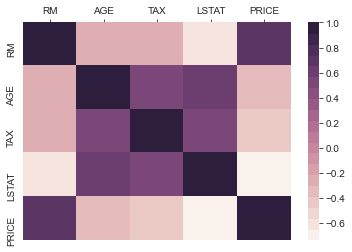

In [19]:
ax = sns.heatmap(df[cols].corr(),
cmap=sns.cubehelix_palette(20, light=.95, dark=.15))

ax.xaxis.tick_top() # move labels to the top

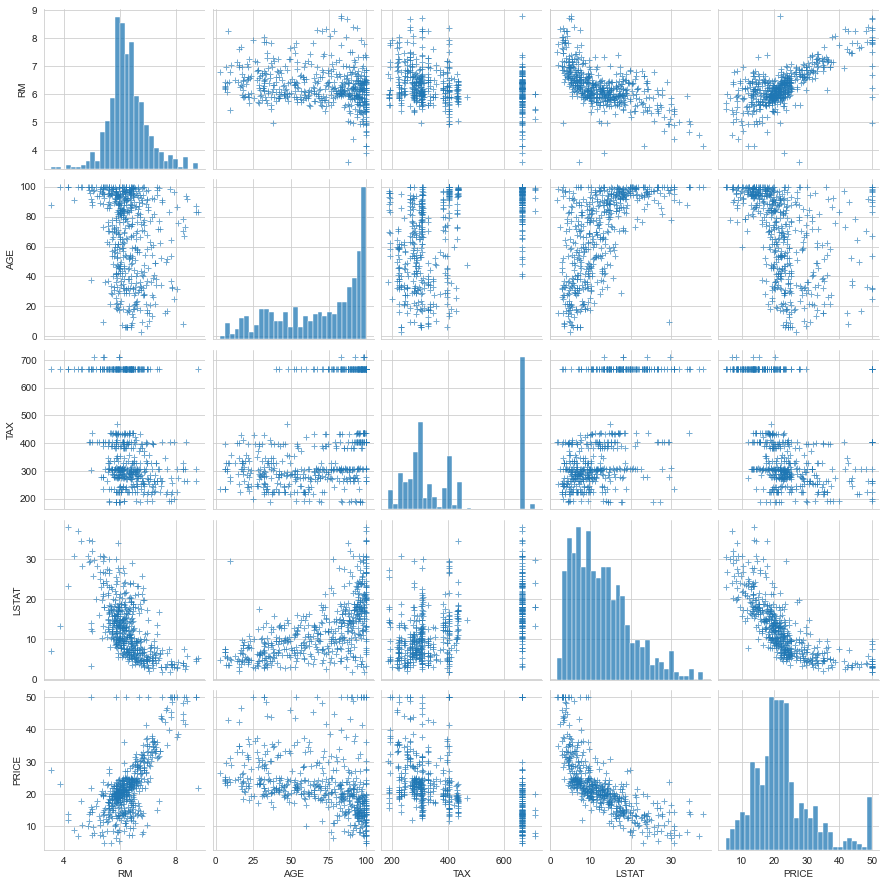

In [20]:
sns.pairplot(df[cols],
plot_kws={'alpha': 0.6, 'marker': '+', 'linewidth': 1}, # alpha is the transparency
diag_kws={'bins': 30})

In [21]:
cols

['RM', 'AGE', 'TAX', 'LSTAT', 'PRICE']

### Predicting

In [22]:
X = df[cols[:-1]]

In [23]:
y = df[cols[-1]]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression(normalize=True)

In [28]:
lm.fit(X_train, y_train)

LinearRegression(normalize=True)

In [29]:
print(lm.intercept_)

0.8209914103750826


In [30]:
print(lm.coef_)

[ 4.91740748  0.0126719  -0.00590856 -0.58934578]


In [31]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
RM,4.917407
AGE,0.012672
TAX,-0.005909
LSTAT,-0.589346


In [32]:
predictions = lm.predict(X_test)

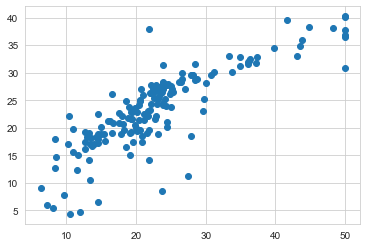

In [33]:
plt.scatter(y_test, predictions)

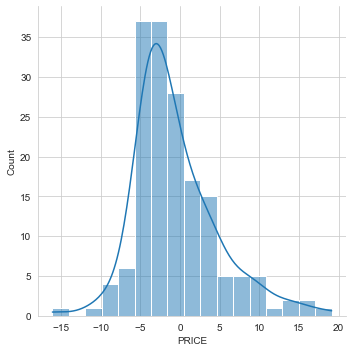

In [34]:
sns.displot(y_test - predictions, kde=True)

In [35]:
X_test.head(1)

,RM,AGE,TAX,LSTAT
307,6.849,70.3,222.0,7.53


Let's get the prediction of the price based on these criteria

First we can get the prediction we already predicted when we used lm.predict(X_test)

In [36]:
print(predictions[0])

29.641675473744485


Or we can calculate it manually using the ceoff_ and intercept

In [37]:
6.849*lm.coef_[0] + 70.3*lm.coef_[1] + 222*lm.coef_[2] + 7.53*lm.coef_[3] + lm.intercept_

29.641675473744485

or we can pass a 2D array containing the criteria to lm.predict() and it will do apply the previous calculation for us

In [38]:
lm.predict([[6.849,70.3,222.0,7.53]])

array([29.64167547])